# 0. 필요 모듈 불러오기

In [1]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import geopandas as gpd

rs = 123
np.random.seed(rs)
random.seed(rs)

# DataFrame 출력 최대 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

#머신러닝
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# 데이터 정리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# 1. 데이터 로드

In [2]:
dataset_gid = gpd.read_file('model_dataset.geojson', driver= 'GeoJSON')
dataset_gid

,gid,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr),geometry
0,다바866110,0,0,0,0,0,0,0,0,0,13,0,0,146.59,4,0,8283.000,0.3500,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ..."
1,다바823157,0,3,4,2,3,0,0,14,0,267,0,1,5944.98,0,0,1181.625,21.1575,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ..."
2,다바928260,0,6,5,0,4,3,0,14,0,78,0,2,1487.49,40,0,3783.750,48.0125,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ..."
3,다바931203,2,1,3,1,1,2,0,5,0,0,0,0,1291.19,409,0,11596.000,97.3600,2.1,1.65,1.25,15.0,0.0,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ..."
4,다바836109,0,2,0,0,2,0,0,6,0,396,0,0,12875.52,0,0,678.875,48.4675,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,286.500,77.6700,0.0,0.00,3.00,21.9,0.0,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ..."
12175,다바968288,0,0,0,0,0,0,0,2,0,0,0,0,0.00,0,0,2515.250,1.2375,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ..."
12176,다바906266,0,0,0,0,0,0,0,3,0,0,0,0,0.00,0,0,16135.250,1.6350,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ..."
12177,다바906193,0,0,0,0,0,0,0,2,1,0,0,0,0.00,0,0,14414.500,31.4150,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ..."


## gid 엔코딩

In [3]:
dataset_encode = pd.DataFrame()
for col in tqdm(dataset_gid.columns):
    if type(dataset_gid[col][0]) == str:
        if col == 'gid':
            gid_lbe = LabelEncoder()
            gid_lbe.fit(dataset_gid[col])
            dataset_encode[col] = gid_lbe.transform(dataset_gid[col])
        else : 
            lbe = LabelEncoder()
            lbe.fit(dataset_gid[col])
            dataset_encode[col] = lbe.transform(dataset_gid[col])
    else:
        dataset_encode[col] = dataset_gid[col]
dataset_encode

100%|██████████| 24/24 [00:00<00:00, 458.58it/s]


,gid,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr),geometry
0,3173,0,0,0,0,0,0,0,0,0,13,0,0,146.59,4,0,8283.000,0.3500,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ..."
1,507,0,3,4,2,3,0,0,14,0,267,0,1,5944.98,0,0,1181.625,21.1575,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ..."
2,8410,0,6,5,0,4,3,0,14,0,78,0,2,1487.49,40,0,3783.750,48.0125,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ..."
3,8682,2,1,3,1,1,2,0,5,0,0,0,0,1291.19,409,0,11596.000,97.3600,2.1,1.65,1.25,15.0,0.0,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ..."
4,1192,0,2,0,0,2,0,0,6,0,396,0,0,12875.52,0,0,678.875,48.4675,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,6668,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,286.500,77.6700,0.0,0.00,3.00,21.9,0.0,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ..."
12175,11088,0,0,0,0,0,0,0,2,0,0,0,0,0.00,0,0,2515.250,1.2375,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ..."
12176,6254,0,0,0,0,0,0,0,3,0,0,0,0,0.00,0,0,16135.250,1.6350,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ..."
12177,6222,0,0,0,0,0,0,0,2,1,0,0,0,0.00,0,0,14414.500,31.4150,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ..."


In [4]:
dataset_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12179 entries, 0 to 12178
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gid          12179 non-null  int64   
 1   acci_cnt     12179 non-null  int64   
 2   보행신호등        12179 non-null  int64   
 3   차량신호등        12179 non-null  int64   
 4   안전지대         12179 non-null  int64   
 5   횡단보도         12179 non-null  int64   
 6   도로속도         12179 non-null  int64   
 7   정차금지대        12179 non-null  int64   
 8   교통안전표지       12179 non-null  int64   
 9   CCTV         12179 non-null  int64   
 10  총인구          12179 non-null  int64   
 11  유턴금지         12179 non-null  int64   
 12  교차로          12179 non-null  int64   
 13  건물면적         12179 non-null  float64 
 14  차량등록대수       12179 non-null  int64   
 15  중앙분리대        12179 non-null  int64   
 16  전체_추정교통량     12179 non-null  float64 
 17  혼잡빈도강도       12179 non-null  float64 
 18  일강수량(mm)     12179 non-nul

In [5]:
# 결과 저장
dataset_encode.to_csv('dataset_encode.csv', header = True, index = False)

## train / test split

In [6]:
X = dataset_encode.drop(['acci_cnt','geometry'], axis=1)
y = dataset_encode['acci_cnt']

# 7:3 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1234)

In [7]:
X_train.max() - X_train.min()

gid            12139.00
보행신호등             12.00
차량신호등             20.00
안전지대              18.00
횡단보도              11.00
도로속도              10.00
정차금지대              3.00
교통안전표지            35.00
CCTV               2.00
총인구             2715.00
유턴금지               4.00
교차로                4.00
건물면적           91368.63
차량등록대수          3640.00
중앙분리대              1.00
전체_추정교통량       64236.00
혼잡빈도강도           100.00
일강수량(mm)         140.00
일 최심적설(cm)         7.90
평균 풍속(m/s)         5.70
평균 지면온도(°C)       48.70
안개 계속시간(hr)       11.70
dtype: float64

## MinMax Scaling

In [8]:
# 스케일링 전에 성능 확인
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as MAE

# 인스턴스화 & fitting
# default 거리함수는 euclidean
model = KNN().fit(X_train, y_train)

# 예측
pred_Y = model.predict(X_test)

#평가
score = MAE(y_test, pred_Y)
print(score)

1.789709906951286


In [9]:
# 스케일링 수행
from sklearn.preprocessing import MinMaxScaler

# 스케일링 인스턴스 생성 & fitting
scaler = MinMaxScaler().fit(X_train)

# 스케일러 transform
# 결과값은 ndarray형태이다. 
s_X_train = scaler.transform(X_train)
s_X_test = scaler.transform(X_test)

In [10]:
# 결과 확인
s_X_train.max() - s_X_train.min()

1.0

In [11]:
# 모델에 적용하여 평가 결과 재확인

model = KNN().fit(s_X_train, y_train)
pred_Y = model.predict(s_X_test)

score = MAE(y_test, pred_Y)
print(score)

1.0118773946360153


모델 성능이 개선된 것을 확인할 수 있다.

원본 데이터 셋에 적용

In [12]:
scaler.fit(X)

# 7:3 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1234)

# 3. Modeling

## 모델별 성능비교 시각화 함수 생성

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

## 3-1. Linear Regression

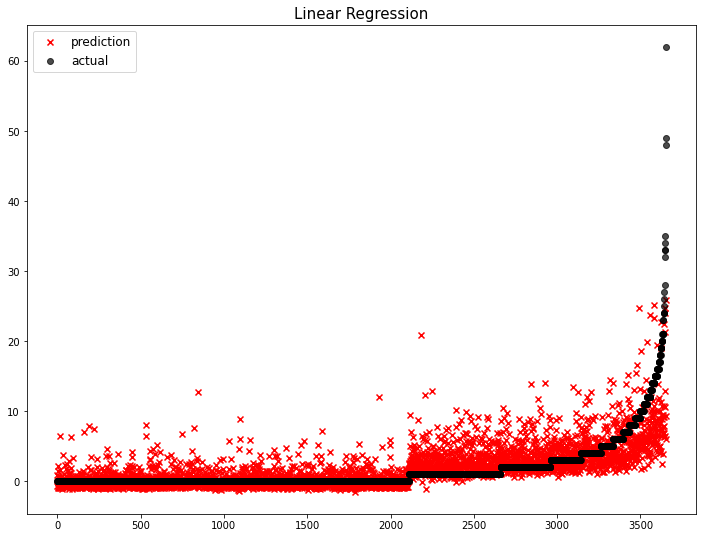

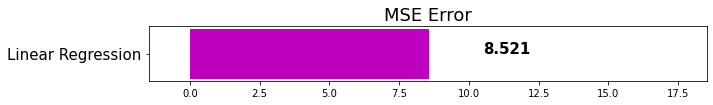

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

acc_linreg = metrics.r2_score(y_test, lm_pred)

mse_eval('Linear Regression', lm_pred, y_test)

## 3-1. KNN Regression

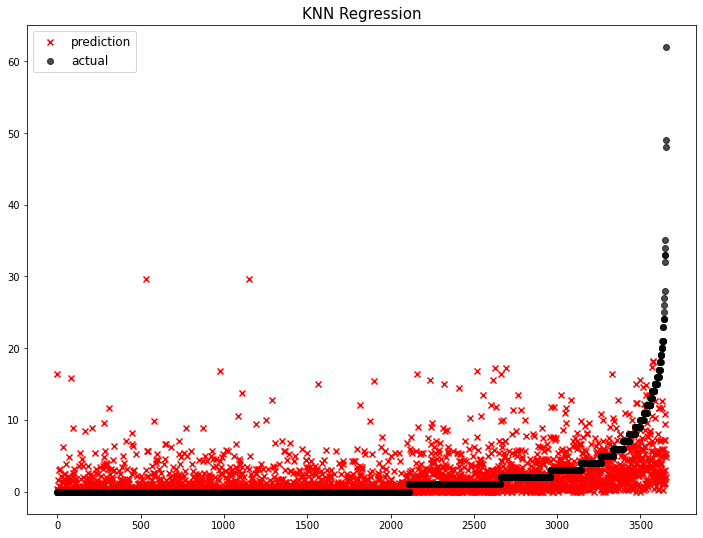

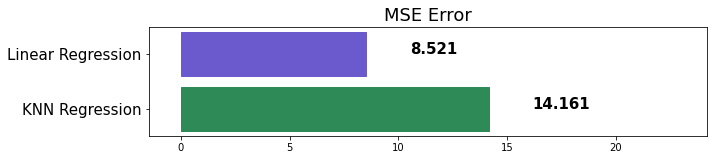

In [15]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

acc_knn = metrics.r2_score(y_test, knn_pred)

mse_eval('KNN Regression', knn_pred, y_test)

# Ensanbles

## 3-2. Random Forest

In [16]:
n_estimators = [5, 10, 15, 20, 25]
max_depth = [2, 3, 5, 10, 15]
maxsamples = [0.5, 0.6, 0.7, None]


hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth':max_depth,
                       'max_samples' : maxsamples}

regressor = RandomForestRegressor()
gd=RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)
best_rf = gd.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.5s finished


0.7200064468325842
RandomForestRegressor(max_depth=15, max_samples=0.7, n_estimators=20)


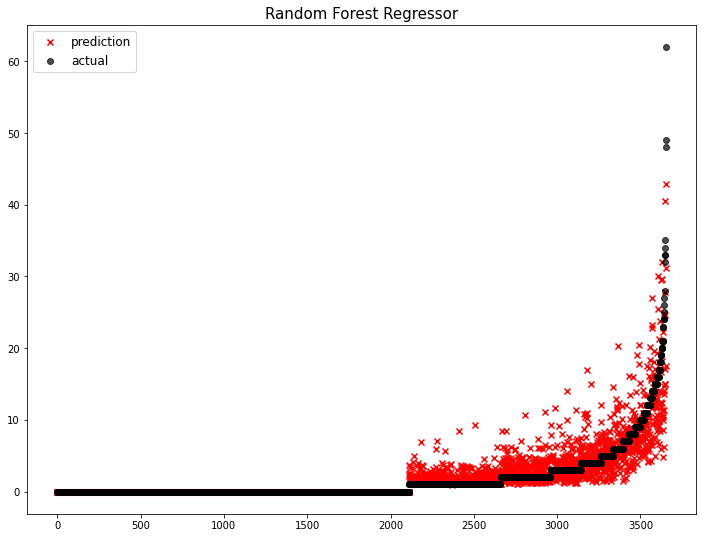

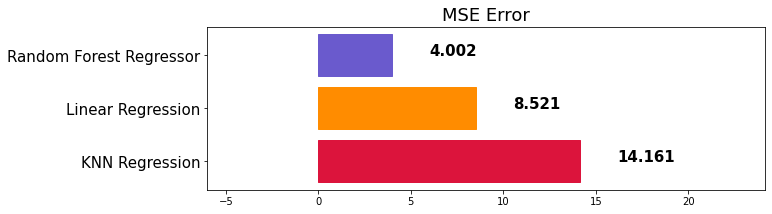

In [17]:
best_rf.fit(X_train, y_train)
rf_pred = best_rf.predict(X_test)

acc_rf = metrics.r2_score(y_test, rf_pred)

mse_eval('Random Forest Regressor', rf_pred, y_test)

Feature importance 확인

In [18]:
f1 = pd.DataFrame({'data': X.columns, 'importance': best_rf.feature_importances_}).sort_values(by='importance', ascending=False)
f1

,data,importance
17,일강수량(mm),0.342430
21,안개 계속시간(hr),0.096633
15,전체_추정교통량,0.082127
18,일 최심적설(cm),0.079818
2,차량신호등,0.065146
1,보행신호등,0.049312
7,교통안전표지,0.040896
19,평균 풍속(m/s),0.039836
20,평균 지면온도(°C),0.037985
16,혼잡빈도강도,0.022852


## 3-3. XGBRegressor

In [19]:
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear'] #default gbtree 
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score = [0.1,0.25,0.5]
n_estimators = [5, 10, 15, 20, 25]


hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth':max_depth,
                       'learning_rate':learning_rate,
                       'min_child_weight':min_child_weight,
                       'booster':booster,
                       'base_score':base_score}

regressor = XGBRegressor()
gd=RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)
best_xgb = gd.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[03:49:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:49:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:49:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.4s finished


0.7327302100331543
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


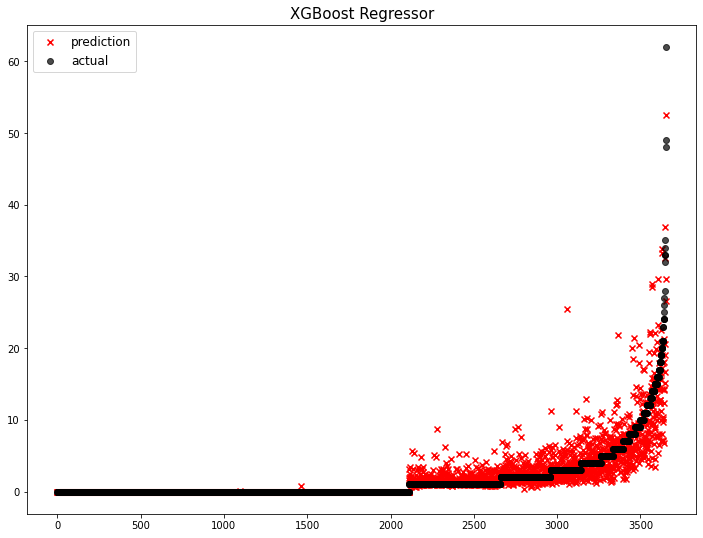

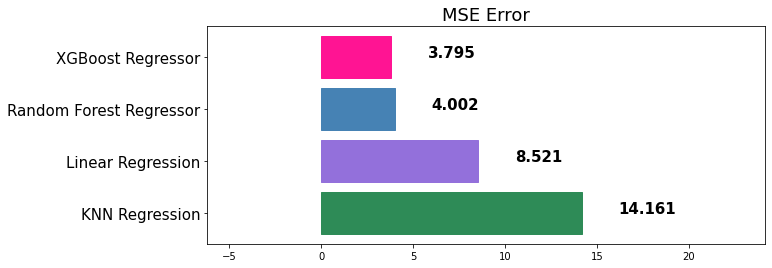

In [20]:
best_xgb.fit(X_train,y_train)
xgb_pred = best_xgb.predict(X_test)

acc_xgb = metrics.r2_score(y_test, xgb_pred)

mse_eval('XGBoost Regressor', xgb_pred, y_test)

Feature importance 확인

In [21]:
f2 = pd.DataFrame({'data': X.columns, 'importance': best_xgb.feature_importances_}).sort_values(by='importance', ascending=False)
f2

,data,importance
17,일강수량(mm),0.173245
1,보행신호등,0.156553
21,안개 계속시간(hr),0.135000
18,일 최심적설(cm),0.100554
8,CCTV,0.082139
2,차량신호등,0.074615
11,교차로,0.059278
6,정차금지대,0.042864
15,전체_추정교통량,0.023562
10,유턴금지,0.023377


## 3-4 LightGBM Regressor

In [22]:
train = lgb.Dataset(X_train, label = y_train) 
test = lgb.Dataset(X_test, label = y_test)

base_score = [0.1,0.25,0.5]
booster=['gbtree','gblinear']
max_depth = [2, 3, 5, 10, 15]
min_child_weight=[1,2,3,4]
n_estimators = [100, 500, 900, 1100, 1500]
num_leaves = [32, 64, 128]

params = {'base_score':base_score,
          'booster':booster,
          'max_depth':max_depth,
          'min_child_weight':min_child_weight,
          'n_estimators':n_estimators,
          'num_leaves':num_leaves
         }

regressor = lgb.LGBMRegressor()
gd=RandomizedSearchCV(estimator=regressor,param_distributions=hyperparameter_grid,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)
best_lgb = gd.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.9s finished


0.7430533902750236
LGBMRegressor(base_score=0.1, booster='gbtree', learning_rate=0.2, max_depth=10,
              min_child_weight=1, n_estimators=20)


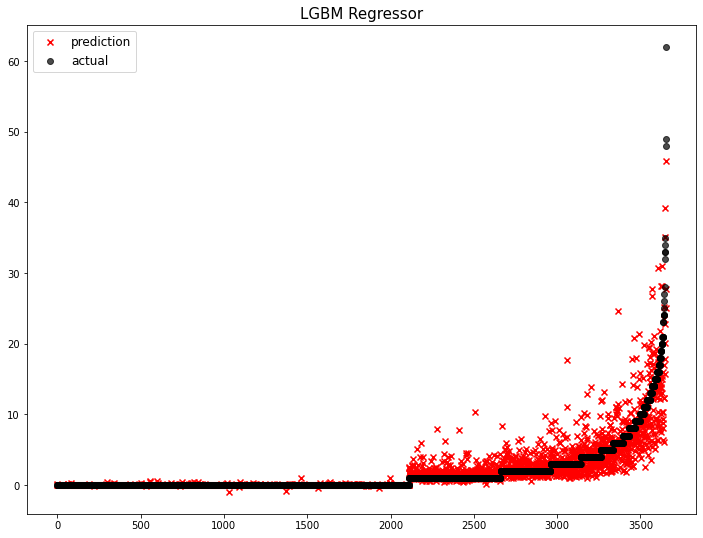

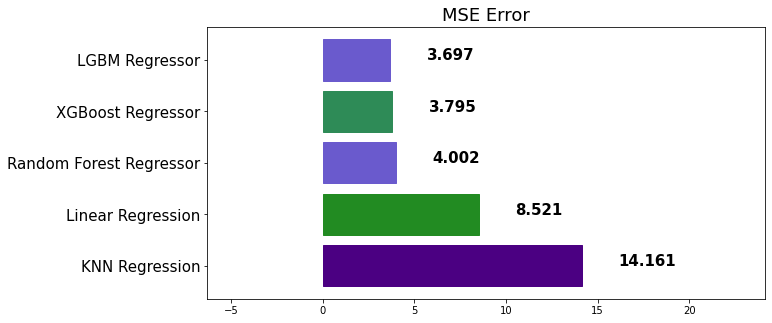

In [23]:
best_lgb.fit(X_train,y_train)
lgbm_pred = best_lgb.predict(X_test)

acc_lgb = metrics.r2_score(y_test, lgbm_pred)

mse_eval('LGBM Regressor', lgbm_pred, y_test)

Feature importance 확인

In [24]:
f3 = pd.DataFrame({'data': X.columns, 'importance': best_lgb.feature_importances_}).sort_values(by='importance', ascending=False)
f3

,data,importance
15,전체_추정교통량,67
17,일강수량(mm),65
20,평균 지면온도(°C),62
18,일 최심적설(cm),61
19,평균 풍속(m/s),59
21,안개 계속시간(hr),43
16,혼잡빈도강도,33
12,건물면적,30
7,교통안전표지,30
4,횡단보도,27


## 3-5. Stacking

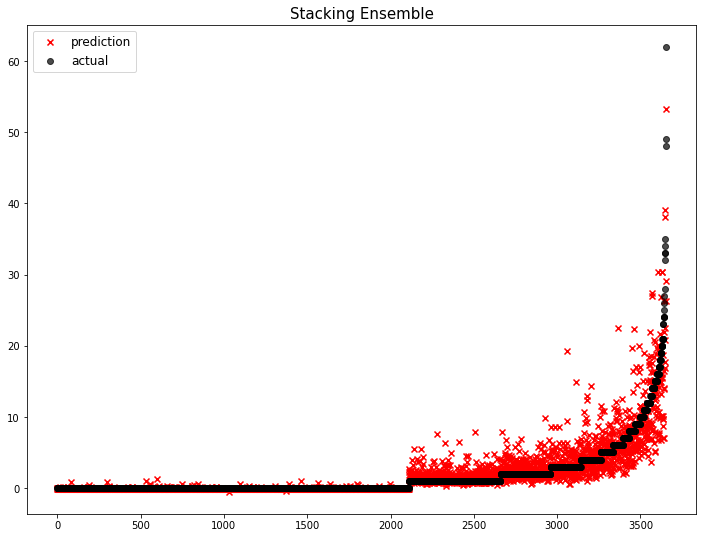

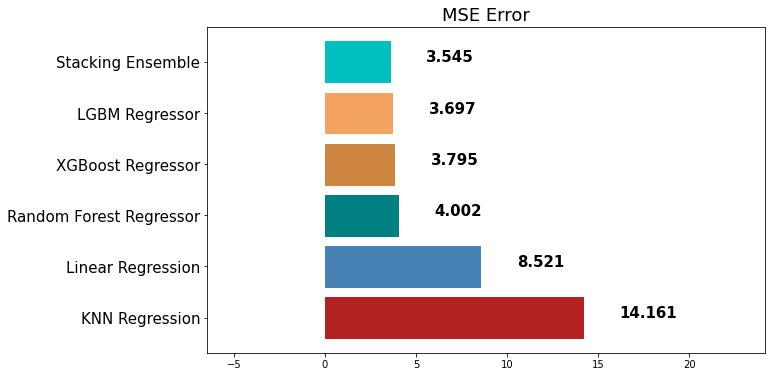

In [25]:
# Stacking할 모델 선택
r1 = best_xgb 
r2 = RandomForestRegressor()
r3 = best_lgb
r4 = GradientBoostingRegressor()

stack_reg = StackingRegressor([('xgb', r1), ('rf', r2),('lgbm',r3),('gb',r4)],n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)

acc_stack = metrics.r2_score(y_test, stack_pred)


mse_eval('Stacking Ensemble', stack_pred, y_test)

## 3-6. Voting

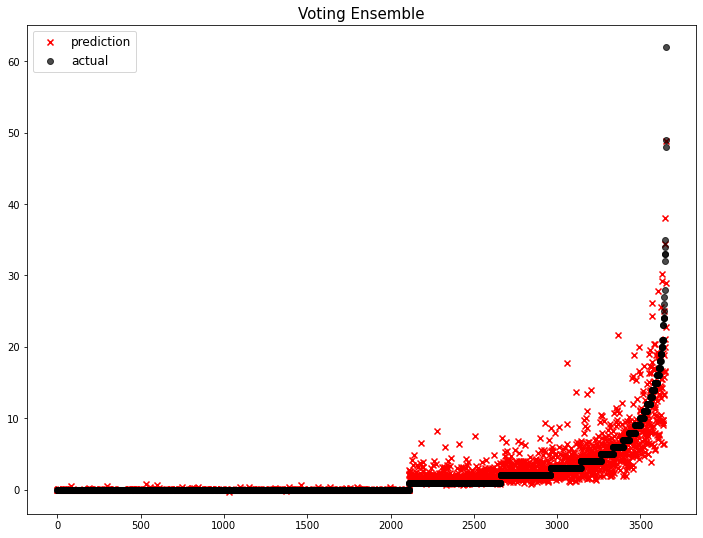

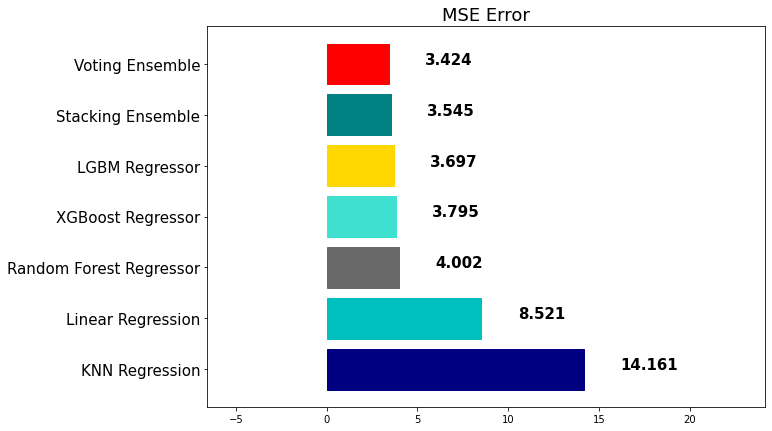

In [26]:
#Voting할 모델 선택
r1 = best_xgb 
r2 = best_rf
r3 = best_lgb
r4 = GradientBoostingRegressor()

vreg = VotingRegressor([('xgb', r1), ('rf', r2),('lgbm',r3),('gb',r4)],weights=[1,0.8,0.8,0.7])

vreg.fit(X_train,y_train)
vreg_pred = vreg.predict(X_test)

acc_vot = metrics.r2_score(y_test, vreg_pred)


mse_eval('Voting Ensemble', vreg_pred, y_test)

In [27]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regression','Random Forest', 'XGBoost', 'LightGBM', 'Stacking','Voting'],
    'R-squared Score': [acc_linreg*100, acc_knn*100, acc_rf*100, acc_xgb*100,acc_lgb*100, acc_stack*100, acc_vot*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
6,Voting,76.316945
5,Stacking,75.479930
4,LightGBM,74.434053
3,XGBoost,73.754596
2,Random Forest,72.323823
0,Linear Regression,41.065428
1,KNN Regression,2.060894


# 4. 결과 도출

Voting 결과가 가장 높은 Voting 을 최종 모델로 사용

In [28]:
dataset_encode['pred']=  vreg.predict(X)

In [29]:
#라벨인코더로 돌린 GID 복원
dataset_encode['gid'] = gid_lbe.inverse_transform(dataset_encode['gid'])

In [30]:
dataset_encode

,gid,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr),geometry,pred
0,다바866110,0,0,0,0,0,0,0,0,0,13,0,0,146.59,4,0,8283.000,0.3500,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",-0.001894
1,다바823157,0,3,4,2,3,0,0,14,0,267,0,1,5944.98,0,0,1181.625,21.1575,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0.002764
2,다바928260,0,6,5,0,4,3,0,14,0,78,0,2,1487.49,40,0,3783.750,48.0125,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0.114919
3,다바931203,2,1,3,1,1,2,0,5,0,0,0,0,1291.19,409,0,11596.000,97.3600,2.1,1.65,1.25,15.0,0.0,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",4.101048
4,다바836109,0,2,0,0,2,0,0,6,0,396,0,0,12875.52,0,0,678.875,48.4675,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0.003151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,286.500,77.6700,0.0,0.00,3.00,21.9,0.0,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ...",1.115204
12175,다바968288,0,0,0,0,0,0,0,2,0,0,0,0,0.00,0,0,2515.250,1.2375,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ...",-0.004184
12176,다바906266,0,0,0,0,0,0,0,3,0,0,0,0,0.00,0,0,16135.250,1.6350,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ...",0.002970
12177,다바906193,0,0,0,0,0,0,0,2,1,0,0,0,0.00,0,0,14414.500,31.4150,0.0,0.00,0.00,0.0,0.0,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ...",0.268722


## 4-1. Pred를 지도로 시각화

In [31]:
ml_result = gpd.GeoDataFrame(dataset_encode, geometry = 'geometry')
ml_result_sort = ml_result.sort_values(by='pred', ascending = False) # pred기준으로 정렬

# geometry별 위/경도 찾기
ml_result_sort['x(경도)'] = ml_result_sort['geometry'].centroid.x
ml_result_sort['y(위도)'] = ml_result_sort['geometry'].centroid.y

# 위 / 경도 기준 50m 반경 데이터 구하기
ml_result_sort['geometry'] = ml_result_sort['geometry'].centroid.buffer(0.0005)
ml_result_sort

,gid,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr),geometry,pred,x(경도),y(위도)
3930,다바854185,49,6,11,0,7,0,0,20,2,0,1,1,1035.50,5,0,17333.307692,55.705000,2.289796,0.128571,1.504082,14.318367,0.120816,"POLYGON ((127.33831 36.36427, 127.33831 36.364...",48.768335,127.337813,36.364272
902,다바904156,50,6,11,0,5,0,0,13,2,13,0,1,906.82,9,0,21535.833333,69.898333,1.830000,0.066000,1.384000,16.570000,0.008400,"POLYGON ((127.39408 36.33819, 127.39408 36.338...",46.727589,127.393583,36.338190
2599,다바911168,56,4,13,0,3,6,0,13,2,123,1,1,478.82,47,0,24953.833333,32.386667,2.185714,0.089286,1.514286,18.869643,0.091250,"POLYGON ((127.40187 36.34902, 127.40187 36.348...",46.195078,127.401369,36.349016
1248,다바939179,51,6,16,0,6,0,0,24,2,0,1,1,3637.26,0,0,14916.388889,34.234444,2.778431,0.047059,1.494118,12.576471,0.186471,"POLYGON ((127.43307 36.35895, 127.43306 36.358...",45.901266,127.432566,36.358954
865,다바831220,52,8,7,0,6,4,0,17,0,0,0,1,999.68,0,0,20155.600000,47.556000,4.032692,0.100000,1.434615,18.542308,0.012885,"POLYGON ((127.31260 36.39579, 127.31260 36.395...",44.670944,127.312100,36.395788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,다바905261,0,0,0,2,0,0,0,2,0,0,0,0,104399.92,174,0,2343.500000,46.225000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((127.39507 36.43285, 127.39507 36.432...",-0.055405,127.394570,36.432852
10967,다바905259,0,5,12,0,4,1,0,4,0,0,0,2,0.00,0,0,2399.100000,29.769000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((127.39507 36.43105, 127.39507 36.431...",-0.123220,127.394572,36.431049
1426,다바951031,0,4,12,0,3,1,0,4,0,0,0,0,110.75,1,0,345.750000,81.460000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((127.44653 36.22553, 127.44653 36.225...",-0.209475,127.446033,36.225532
6816,다바961125,0,5,12,0,3,0,0,9,0,439,0,0,3432.28,0,0,1856.000000,66.781667,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((127.45761 36.31028, 127.45761 36.310...",-0.223695,127.457114,36.310282


In [32]:
# 전체 데이터 예측 결과 저장
ml_result_sort.to_file('map_result.geojson', driver= 'GeoJSON')

In [33]:
import folium

#대전시 중앙으로 오게 설정
center = (36.35, 127.4)
zoom = 12

#folium.Map으로 지도 그리기
m = folium.Map(location = center, 
               zoom_start = zoom,
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/BB730805-E115-3140-9139-BB79B7E3B74F/Base/{z}/{y}/{x}.png',
               attr = '대전시'
              )

# hilight 색 지정
red = {'fillColor': 'purple', 'color': 'purple'}

#geojson에서 받은 값중 상위 100개만 지도에 표시
folium.GeoJson(ml_result_sort.head(100),name='test2', style_function=lambda x:red).add_to(m)

# 시각화
m

In [34]:
# 최종 결과 지도 백업
result_map = gpd.read_file('map_result.geojson')

In [35]:
# 결과 도출 위해 사고 발생건수 상위 100개 추출
result_map = result_map.iloc[0:100, :]
result_map

,gid,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr),pred,x(경도),y(위도),geometry
0,다바854185,49,6,11,0,7,0,0,20,2,0,1,1,1035.50,5,0,17333.307692,55.705000,2.289796,0.128571,1.504082,14.318367,0.120816,48.768335,127.337813,36.364272,"POLYGON ((127.33831 36.36427, 127.33831 36.364..."
1,다바904156,50,6,11,0,5,0,0,13,2,13,0,1,906.82,9,0,21535.833333,69.898333,1.830000,0.066000,1.384000,16.570000,0.008400,46.727589,127.393583,36.338190,"POLYGON ((127.39408 36.33819, 127.39408 36.338..."
2,다바911168,56,4,13,0,3,6,0,13,2,123,1,1,478.82,47,0,24953.833333,32.386667,2.185714,0.089286,1.514286,18.869643,0.091250,46.195078,127.401369,36.349016,"POLYGON ((127.40187 36.34902, 127.40187 36.348..."
3,다바939179,51,6,16,0,6,0,0,24,2,0,1,1,3637.26,0,0,14916.388889,34.234444,2.778431,0.047059,1.494118,12.576471,0.186471,45.901266,127.432566,36.358954,"POLYGON ((127.43307 36.35895, 127.43306 36.358..."
4,다바831220,52,8,7,0,6,4,0,17,0,0,0,1,999.68,0,0,20155.600000,47.556000,4.032692,0.100000,1.434615,18.542308,0.012885,44.670944,127.312100,36.395788,"POLYGON ((127.31260 36.39579, 127.31260 36.395..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,다바855174,24,8,9,1,6,3,0,12,0,17,1,1,2043.76,31,0,8327.928571,79.549286,9.470833,0.000000,1.545833,17.258333,0.020000,20.231811,127.338948,36.354357,"POLYGON ((127.33945 36.35436, 127.33945 36.354..."
96,다바939166,28,2,6,1,3,2,0,9,0,9,1,1,727.28,9,0,12393.250000,36.206250,3.235714,0.000000,1.385714,15.485714,0.219643,20.074675,127.432576,36.347234,"POLYGON ((127.43308 36.34723, 127.43307 36.347..."
97,다바833216,21,3,4,1,2,0,0,11,0,0,0,1,0.00,24,0,23402.166667,26.801667,2.780952,0.504762,1.500000,10.523810,0.413810,20.014305,127.314338,36.392186,"POLYGON ((127.31484 36.39219, 127.31484 36.392..."
98,다바897256,33,6,9,0,5,2,0,14,0,12,1,1,428.50,11,0,12710.777778,63.149444,1.148485,0.060606,1.190909,11.518182,0.224848,19.939502,127.385651,36.428337,"POLYGON ((127.38615 36.42834, 127.38615 36.428..."


In [36]:
result_map_coordinate = result_map.loc[:, 'pred':'geometry']
result_map_coordinate

,pred,x(경도),y(위도),geometry
0,48.768335,127.337813,36.364272,"POLYGON ((127.33831 36.36427, 127.33831 36.364..."
1,46.727589,127.393583,36.338190,"POLYGON ((127.39408 36.33819, 127.39408 36.338..."
2,46.195078,127.401369,36.349016,"POLYGON ((127.40187 36.34902, 127.40187 36.348..."
3,45.901266,127.432566,36.358954,"POLYGON ((127.43307 36.35895, 127.43306 36.358..."
4,44.670944,127.312100,36.395788,"POLYGON ((127.31260 36.39579, 127.31260 36.395..."
...,...,...,...,...
95,20.231811,127.338948,36.354357,"POLYGON ((127.33945 36.35436, 127.33945 36.354..."
96,20.074675,127.432576,36.347234,"POLYGON ((127.43308 36.34723, 127.43307 36.347..."
97,20.014305,127.314338,36.392186,"POLYGON ((127.31484 36.39219, 127.31484 36.392..."
98,19.939502,127.385651,36.428337,"POLYGON ((127.38615 36.42834, 127.38615 36.428..."


## 4-2 . 교통 노드 파일 활용해 위치명 정보 추출

In [37]:
node = gpd.read_file('18.대전광역시_교통노드(2018).geojson')

In [38]:
# 결과 지도상의 geometry와 node의 NODE_NAME  매칭

placename_list = []
for i in tqdm(range(result_map.shape[0])): 
    area = result_map_coordinate ['geometry'].iloc[i] # 결과 map의 geometry 불러오기
    place = node[node['geometry'].within(area)] # node의 geometry와 결과 map geometry가 겹치는 부분 추출
    element = place["NODE_NAME"].values 
    placename_list.append(element) # 겹치는 부분 list에 담기

100%|██████████| 100/100 [00:00<00:00, 422.72it/s]


In [39]:
# list에 담은 NODE_NAME 을 리스트화
placename = []
for i in tqdm(range(len(placename_list))):
    if len(placename_list[i]) == 0:
        placename.append('-')
    else :
        arr = placename_list[i]
        placename.append(str(arr[0]))

100%|██████████| 100/100 [00:00<00:00, 407609.72it/s]


In [40]:
result_map_coordinate['시설명/주소지']=placename

In [41]:
result_map_coordinate.head()

,pred,x(경도),y(위도),geometry,시설명/주소지
0,48.768335,127.337813,36.364272,"POLYGON ((127.33831 36.36427, 127.33831 36.364...",궁동네거리
1,46.727589,127.393583,36.338190,"POLYGON ((127.39408 36.33819, 127.39408 36.338...",용문네거리
2,46.195078,127.401369,36.349016,"POLYGON ((127.40187 36.34902, 127.40187 36.348...",삼천교사거리
3,45.901266,127.432566,36.358954,"POLYGON ((127.43307 36.35895, 127.43306 36.358...",중리네거리
4,44.670944,127.312100,36.395788,"POLYGON ((127.31260 36.39579, 127.31260 36.395...",외삼네거리
